<a href="https://colab.research.google.com/github/syadrn/MSIB-K2-KelasAwanPintar/blob/main/Logika%20dan%20Konsep%20AI/ML_3_Classification_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-3 Classification using Decision Tree

Pada praktik kali ini, kita akan coba mengembangkan model Decision Tree yang dapat memprediski apakah seseorang beresiko menderita diabetes atau tidak.

# Import Library

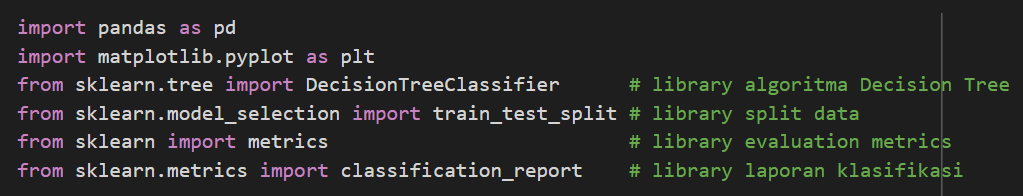

In [ ]:
# Tulis di sini
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# Load dataset


Download dataset [di sini](https://drive.google.com/file/d/1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK/view?usp=sharing)

Setelah dataset berhasil di-download, upload dataset ke Colab supaya bisa digunakan.

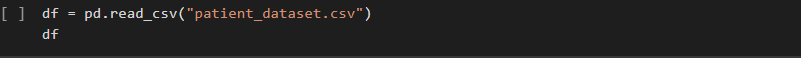

In [ ]:
# Tulis di sini
df = pd.read_csv("patient_dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Periksa kelengkapan dataset dengan melihat metadatanya menggunakan method `info()`.

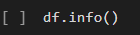

In [ ]:
# Tulis di sini
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 8 feature:
- Pregnancies
- Glucose
- BooldPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

dan satu label, yakni Outcome:

- Label 0 = tidak berpotensi menderita diabetes
- Label 1 = berpotensi menderita diabetes

# Data Exploration

**Pisahkan X dan Y dari dataset**

Salah satu kelebihan algoritma Decision Tree adalah kita tidak perlu menormalisasi feature.

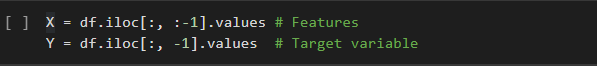

In [ ]:
# Tulis di sini
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]



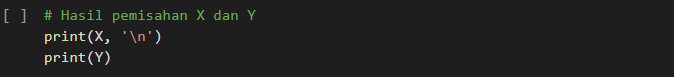

In [ ]:
# Tulis di sini
print(X, "\n")
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**Splitting Data**

Split data menjadi:
- training set (X_train, y_train)
- test set (X_test, y_test)

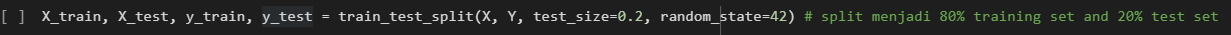

In [ ]:
# Tulis di sini
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

---

# Modeling

Algoritma Decision Tree memiliki banyak hyperparameter yang bisa kita setel (tuning hyperparameter). Empat diantaranya adalah:

Hpyerparameter | Keterangan
---|---
criterion | Fungsi untuk mengukur kualitas sebuah split
max_depth | Kedalaman maksimum tree
max_leaf_nodes | Jumlah leaf node maksimum
random_state | Mengontrol ke-random-an algoritma

Hasil tuning hyperparameter yang tepat dapat meningkatkan performa model.

**Note:**

Jika kita tidak tahu secara pasti kegunaan hyperparameter, kita bisa menggunakan setelan default dengan cara mengosongkan hyperparameter.

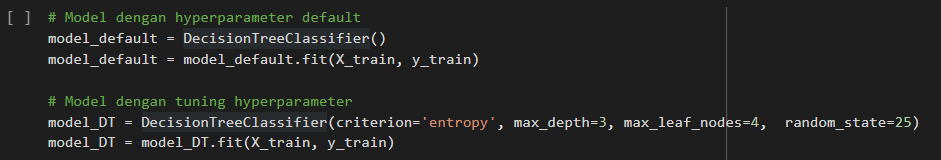

In [ ]:
# Tulis di sini
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, Y_train)

model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, Y_train)

---

# Evaluation

**Mengevaluasi Performa Model dengan Hyperparameter Default**

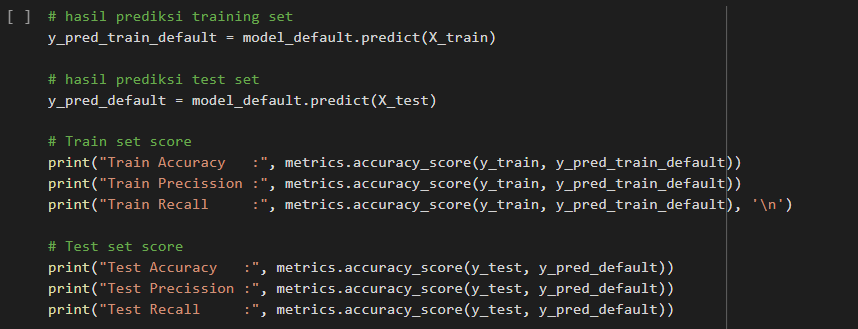

In [ ]:
# Tulis di sini
y_pred_train_default = model_default.predict(X_train)
y_pred_default = model_default.predict(X_test)

print('Train Accuracy: ', metrics.accuracy_score(Y_train, y_pred_train_default))
print('Train Precission: ', metrics.precision_score(Y_train, y_pred_train_default))
print('Train Recall: ', metrics.recall_score(Y_train, y_pred_train_default), '\n')

print('Test Accuracy: ', metrics.accuracy_score(Y_test, y_pred_default))
print('Test Precission: ', metrics.precision_score(Y_test, y_pred_default))
print('Test Recall: ', metrics.recall_score(Y_test, y_pred_default))


Train Accuracy:  1.0
Train Precission:  1.0
Train Recall:  1.0 

Test Accuracy:  0.7597402597402597
Test Precission:  0.6451612903225806
Test Recall:  0.7272727272727273


**Mengevaluasi Performa Model dengan Tuning Hyperparameter**

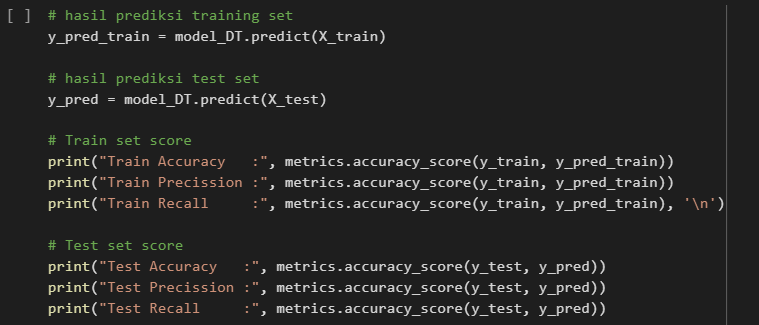

In [ ]:
# Tulis di sini
y_pred_train = model_DT.predict(X_train)
y_pred = model_DT.predict(X_test)

print('Train Accuracy: ', metrics.accuracy_score(Y_train, y_pred_train))
print('Train Precission: ', metrics.precision_score(Y_train, y_pred_train))
print('Train Recall: ', metrics.recall_score(Y_train, y_pred_train), '\n')

print('Test Accuracy: ', metrics.accuracy_score(Y_test, y_pred))
print('Test Precission: ', metrics.precision_score(Y_test, y_pred))
print('Test Recall: ', metrics.recall_score(Y_test, y_pred))


Train Accuracy:  0.7719869706840391
Train Precission:  0.7239263803680982
Train Recall:  0.5539906103286385 

Test Accuracy:  0.7727272727272727
Test Precission:  0.7272727272727273
Test Recall:  0.5818181818181818


Berdasarkan hasil evaluasi performa:

- model dengan hyperparameter default mengalami overfitting
- model dengan tuning hyperparameter sudah **good fit**, meskipun memiliki train set score yang lebih rendah



---

**Generate Classification Report**

Kita juga dapat menampilkan hasil evaluasi model menggunakan `classification report`.

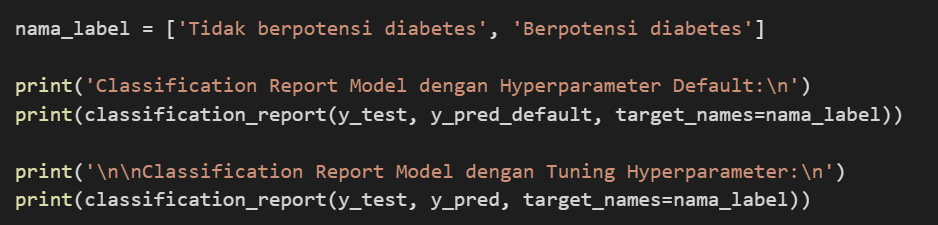

In [ ]:
# Tulis di sini
nama_label = ["tidak berpotensi diabetes", 'berpotensi diabetes']
print("Classification Report model dengan Hyperparameter Default:\n")
print(classification_report(Y_test, y_pred_default, target_names=nama_label))
print('\n\nClassification Report model dengan Tuning Hyperparameter:\n')
print(classification_report(Y_test, y_pred, target_names=nama_label))


Classification Report model dengan Hyperparameter Default:

                           precision    recall  f1-score   support

tidak berpotensi diabetes       0.84      0.78      0.81        99
      berpotensi diabetes       0.65      0.73      0.68        55

                 accuracy                           0.76       154
                macro avg       0.74      0.75      0.75       154
             weighted avg       0.77      0.76      0.76       154



Classification Report model dengan Tuning Hyperparameter:

                           precision    recall  f1-score   support

tidak berpotensi diabetes       0.79      0.88      0.83        99
      berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification report menampilkan informasi yang lebih detail dan banyak dibanding evaluation metrics.

# Men-Generate Tree

**Tree Model dengan Hyperparameter Default**

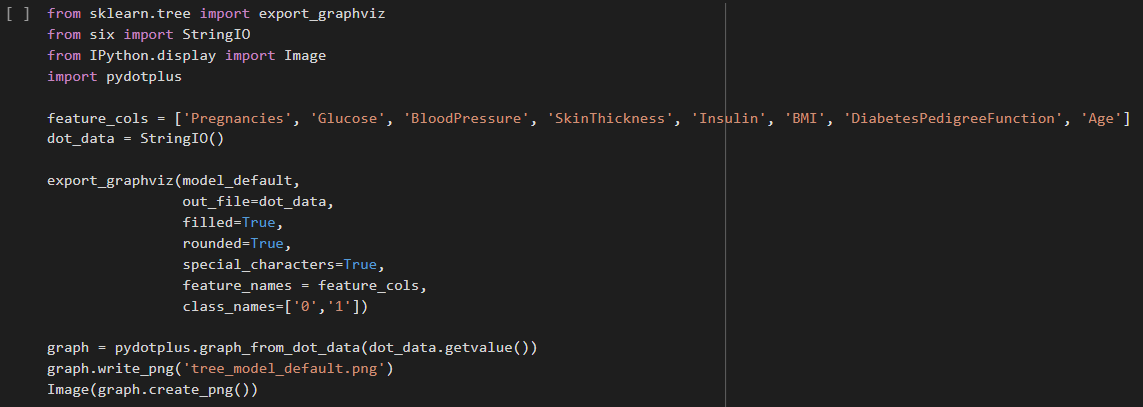

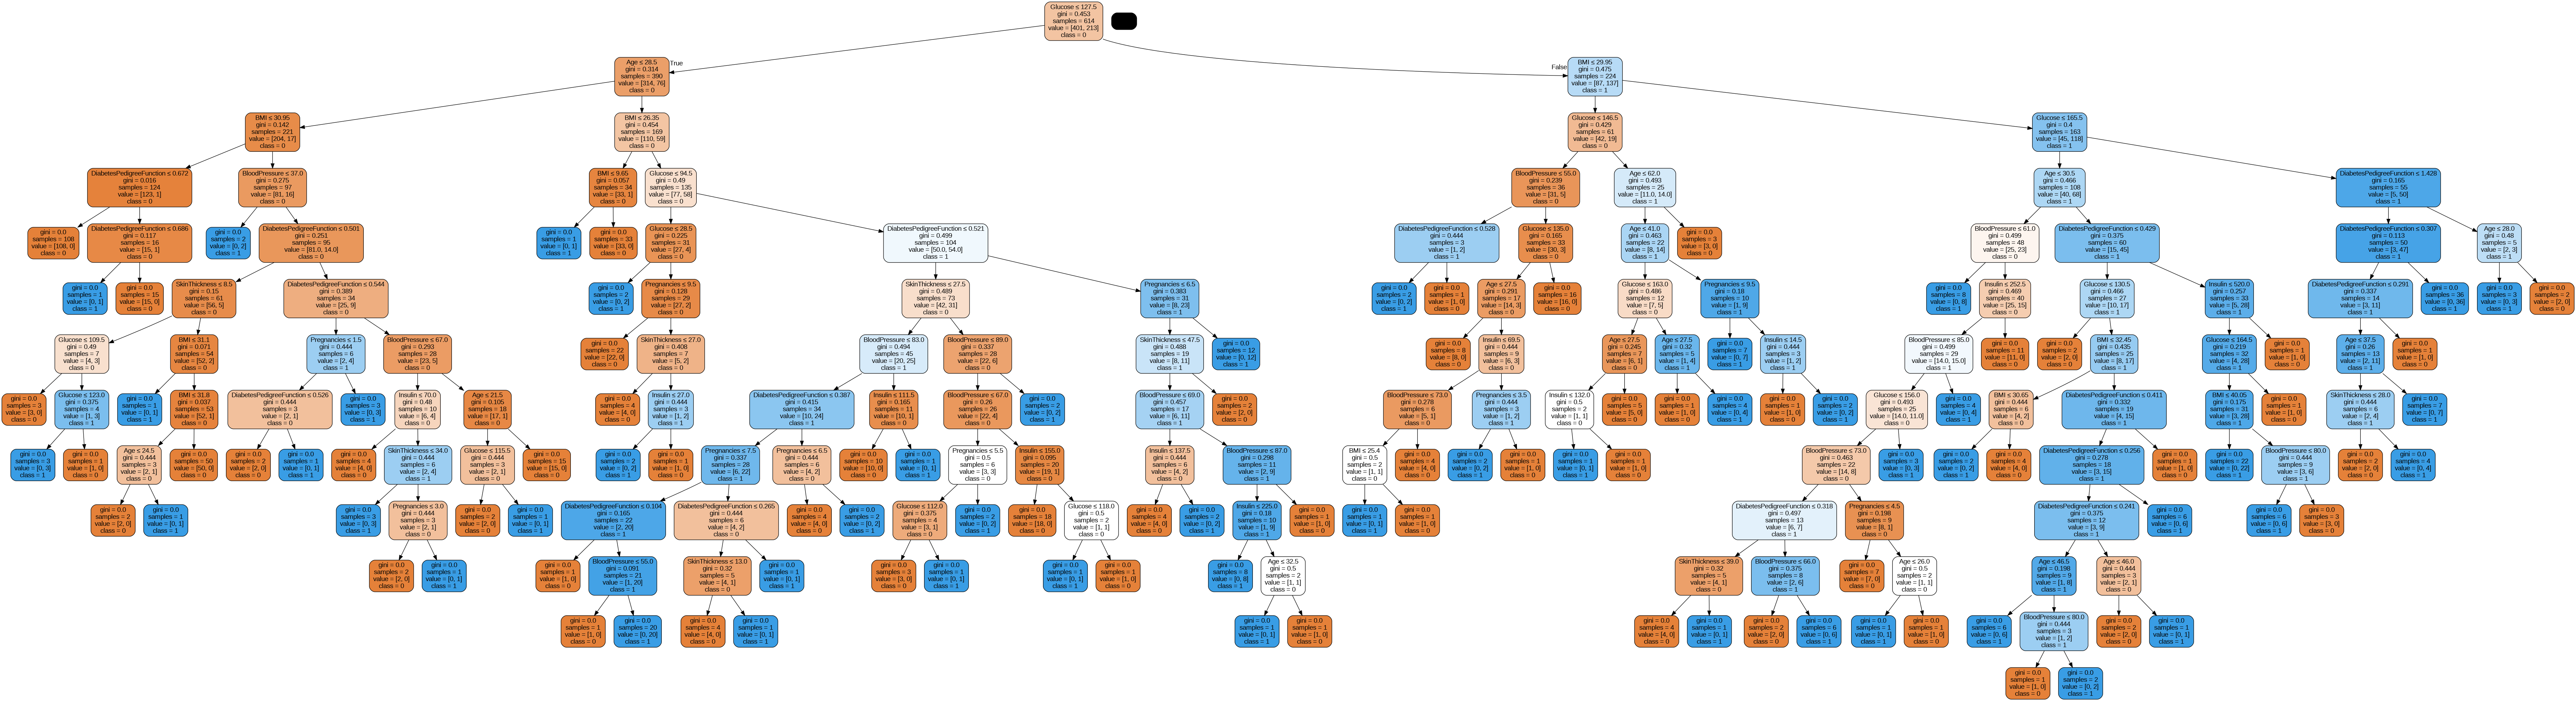

In [ ]:
# Tulis di sini
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
feature_cols = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_default.png')
Image(graph.create_png())

**Tree Model dengan Tuning Hyperparameter**

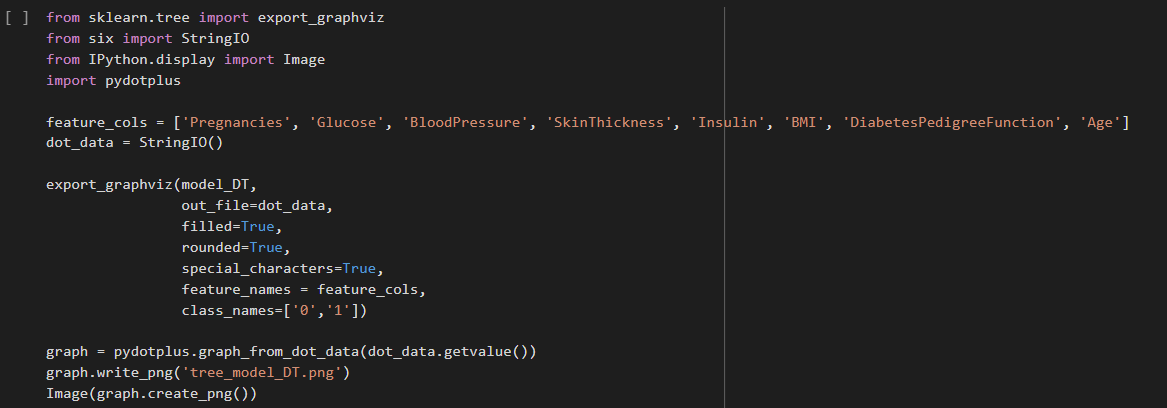

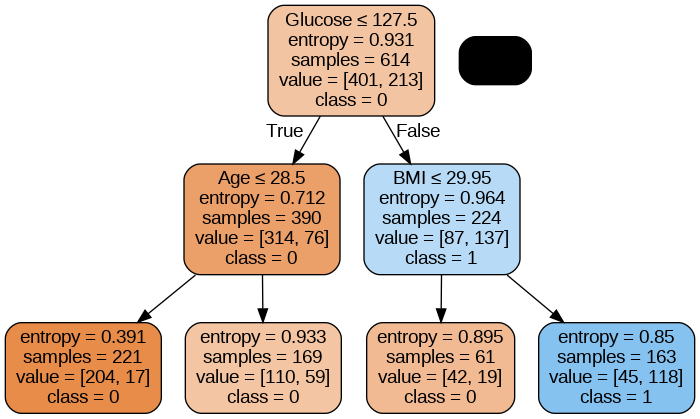

In [ ]:
# Tulis di sini
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
feature_cols = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

Manakah tree yang lebih baik menurut kamu? Kemukakan pendapatmu beserta alasannya!

> **FYI**: Image tree bisa kita download via side menu Colab.

---

**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

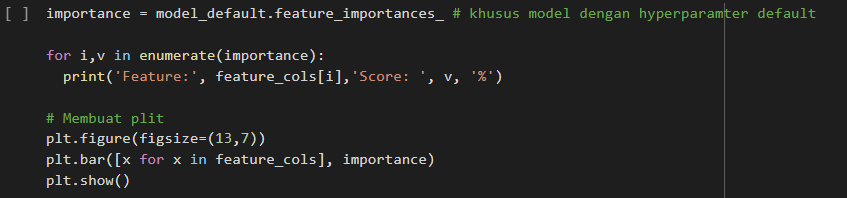

features Pregnancies score: 0.05754999060361945 &
features Glucose score: 0.3112143826879075 &
features BloodPressure score: 0.14566965149934905 &
features SkinThickness score: 0.05802137663606443 &
features Insulin score: 0.06734618937568339 &
features BMI score: 0.1363148715067221 &
features DiabetesPedigreeFunction score: 0.09869793084558327 &
features Age score: 0.12518560684507077 &


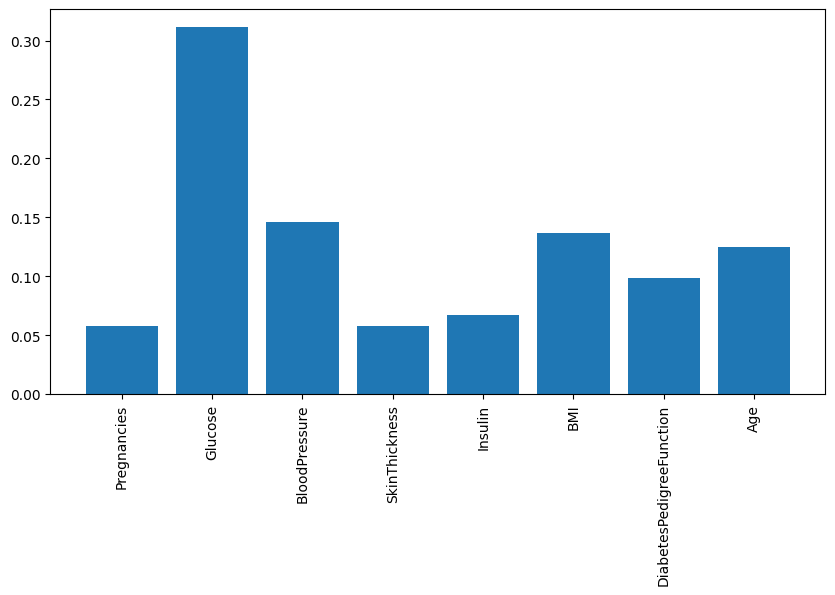

In [ ]:
# Tulis di sini
importance = model_default.feature_importances_

for i,v in enumerate(importance):
  print('features', feature_cols[i], 'score:', v, '&')

plt.figure(figsize=(10,5))
plt.bar([x for x in feature_cols], importance)
plt.xticks(rotation='vertical')
plt.show()



---



# Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.



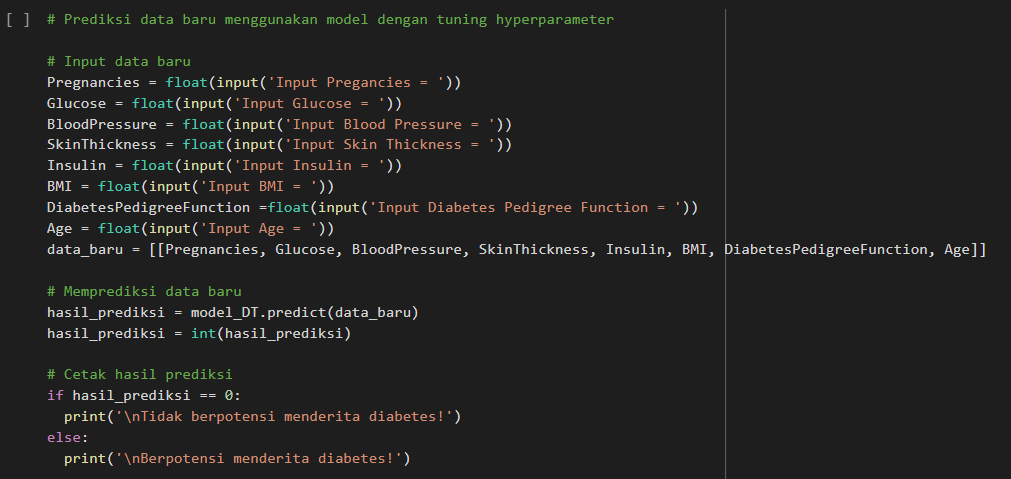

In [ ]:
# Tulis di sini
# Prediksi data baru menggunakan model dengan tuning hyperparameter

# Input data baru
Pregnancies = float(input('Input Pregnancies = '))
Glucose = float(input('Input Glucose = '))
BloodPressure = float(input('Input Blood Pressure = '))
SkinThickness = float(input('Input Skin Thickness = '))
Insulin = float(input('Input Insulin = '))
BMI = float(input('Input BMI = '))
DiabetesPedigreeFunction = float(input('Input Diabetes Pedigree Function = '))
Age = float(input('Input Age = '))

data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

# Memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

# Cetak hasil prediksi
if hasil_prediksi == 0:
    print('\nTidak berpotensi menderita diabetes!')
else:
    print('\nBerpotensi menderita diabetes!')


Input Pregnancies = 45
Input Glucose = 67
Input Blood Pressure = 45
Input Skin Thickness = 56
Input Insulin = 67
Input BMI = 34
Input Diabetes Pedigree Function = 34
Input Age = 19

Tidak berpotensi menderita diabetes!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-64-a3363733c4e4>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil_prediksi = int(hasil_prediksi)


# Exercise (Latihan)

Lakukan pemodelan ulang menggunakan dataset yang sama!
1. Gunakan algoritma Decision Tree
2. Pilih 4 dari 8 feature yang tersedia
3. Lakukan tuning hyperparameter hingga mendapat model dengan performa terbaik
4. Generate tree model
5. Buat kesimpulan dari activity yang sudah dilakukan

Accuracy: 0.7337662337662337


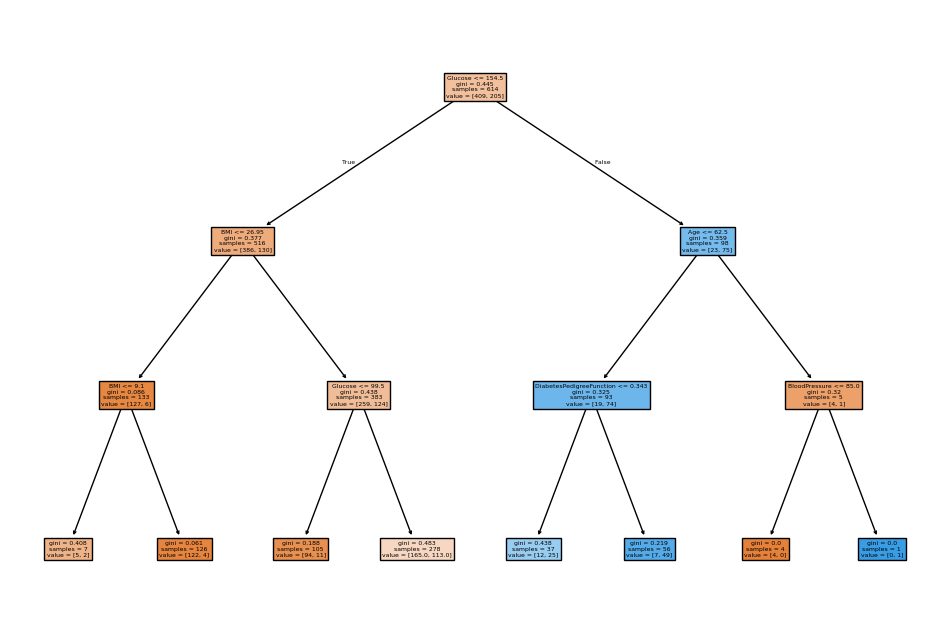

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load data
# ...

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Best estimator
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(best_clf, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
# JAWABAN TAMBAHAN KALO DI PERLUKAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

dataset = pd.read_csv('patient_dataset.csv')

selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
X = dataset[selected_features]
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f'Best Parameters: {grid_search.best_params_}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Accuracy: 75.97%
